<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>November 9, 2016: splitting from "big" notebook
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions applied to Fibonacci matrix and a matrix with a eigenvalue with multiplicity greater than 1.
</div>

In [4]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a

init_printing()

In [5]:
%run ../../src/matrix_functions.py

# Fibonacci matrix

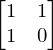

In [6]:
F = Matrix([
        [1, 1],
        [1, 0],
    ])
F

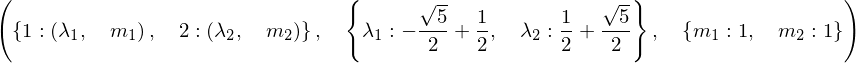

In [7]:
data, eigenvals, multiplicities = eigendata = eigen_data(m)
eigendata

In [8]:
m=2

In [9]:
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_poly

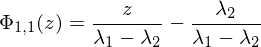

In [10]:
make = Phi_poly_define(Phi_poly, eigendata=eigendata)
make(i=1, j=1,)

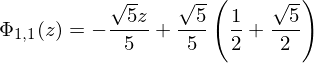

In [11]:
_.subs(eigenvals).collect(z)

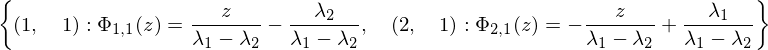

In [12]:
Phi_polynomials = component_polynomials(Phi_poly, eigendata)
Phi_polynomials

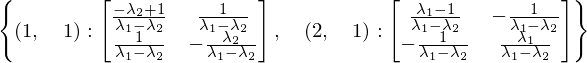

In [13]:
cmatrices = component_matrices(m, Phi_polynomials)
cmatrices

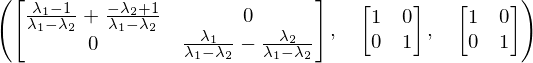

In [14]:
Zi1 = list(cm.as_immutable() for (i, j), cm in cmatrices.items() if j == 1)

s = zeros(m.rows)
for Z in Zi1:
    s += Z
s, s.simplify(), s.subs(eigenvals).applyfunc(simplify)

## `power` function

In [14]:
f = Function('f')
f_power = define(let=f(z), be=z**r)
f_power

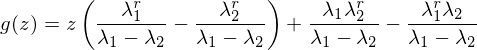

In [17]:
g_power = g_poly(f_power, eigendata, Phi_polynomials)
g_power

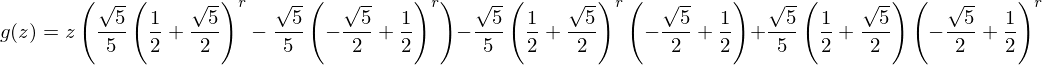

In [18]:
g_power = g_power.subs(eigenvals)
g_power

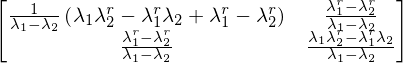

In [18]:
with lift_to_matrix_function(g_power) as g_power:
    m_power = g_power(F)
m_power

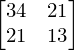

In [20]:
m_power.subs(eigenvals).subs({r:8}).applyfunc(simplify)

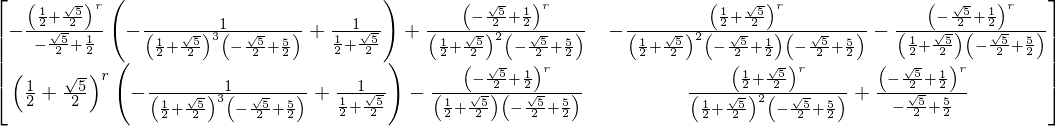

In [21]:
F**r

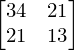

In [22]:
_.subs({r:8}).applyfunc(simplify)

# A multiplicity greater than 1

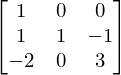

In [25]:
m = Matrix([
        [1, 0, 0],
        [1, 1, -1],
        [-2, 0, 3],
    ])
m

In [26]:
data, eigenvals, multiplicities = eigendata = eigen_data(m)
eigendata

In [27]:
m_bar = 3 # degree of \Xi minimal polynomial
Phi_poly = Phi_poly_ctor(deg=m_bar-1)
Phi_poly

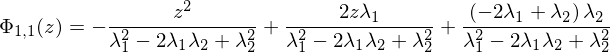

In [28]:
make = Phi_poly_define(Phi_poly, eigendata=eigendata)
make(i=1, j=1,)

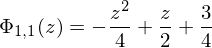

In [29]:
_.subs(eigenvals)

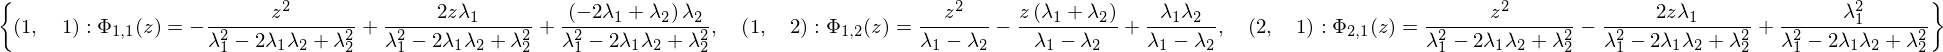

In [30]:
Phi_polynomials = component_polynomials(Phi_poly, eigendata)
Phi_polynomials

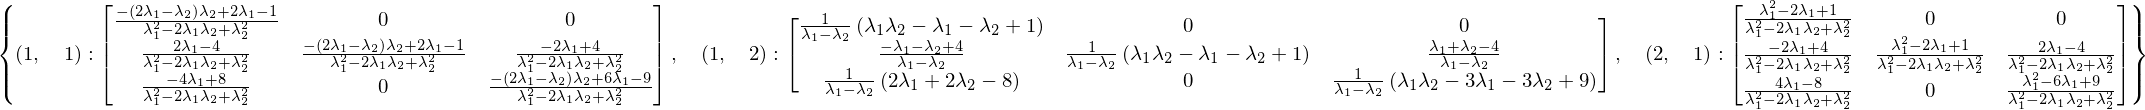

In [31]:
cmatrices = component_matrices(m, Phi_polynomials)
cmatrices

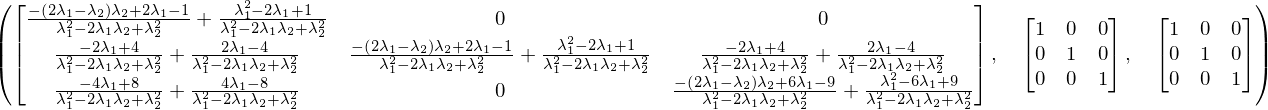

In [32]:
Zi1 = list(cm.as_immutable() for (i, j), cm in cmatrices.items() if j == 1)

s = zeros(m.rows)
for Z in Zi1:
    s += Z
s, s.simplify(), s.subs(eigenvals)

## `inverse` function

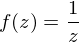

In [33]:
f, h = Function('f'), Function('h')
f_inverse = define(let=f(z), be=1/(z))
f_inverse

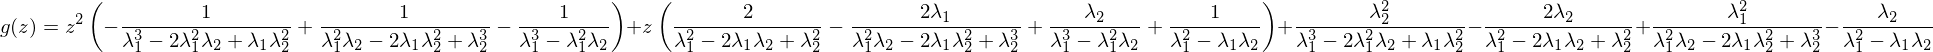

In [34]:
g_inverse = g_poly(f_inverse, eigendata, Phi_polynomials)
g_inverse

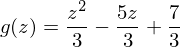

In [35]:
g_inverse = g_inverse.subs(eigenvals)
g_inverse

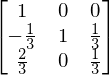

In [36]:
with lift_to_matrix_function(g_inverse) as g_inverse:
    m_inverse = g_inverse(m)
m_inverse

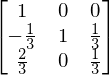

In [37]:
m**(-1)

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.